## MLSC - Classification

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br>

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context

**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

# Table of Content

1. Data Preprocessing - **3 Marks**
2. Logistic Regression Model - **3 Marks**
3. Decision Tree Model - **3 Marks**
4. Random Forest Model - **5 Marks**
5. XGBoost Model - **5 Marks**
6. Compare the Results of all the above mentioned algorithms - **5 Marks**
7. Intrepret your solution based on the results - **6 Marks**


<a id="logreg"> </a>
## 1. Data Pre-Processing

**Import the required libraries**

In [1]:
!pip install xgboost

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#### Load the csv file

In [3]:
# Load the dataset
data = pd.read_csv('bank.csv')
data.head()  # Display the first few rows of the dataset

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,no
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1,yes
2,45,45,8,999,0,1.4,93.444,-36.1,4.963,5228.1,no
3,33,400,1,5,2,-1.1,94.601,-49.5,1.032,4963.6,yes
4,47,903,2,999,1,-1.8,93.075,-47.1,1.415,5099.1,yes


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Prepare the data </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
data.info()  # Check the data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9640 non-null   int64  
 1   duration        9640 non-null   int64  
 2   campaign        9640 non-null   int64  
 3   pdays           9640 non-null   int64  
 4   previous        9640 non-null   int64  
 5   emp.var.rate    9640 non-null   float64
 6   cons.price.idx  9640 non-null   float64
 7   cons.conf.idx   9640 non-null   float64
 8   euribor3m       9640 non-null   float64
 9   nr.employed     9640 non-null   float64
 10  y               9640 non-null   object 
dtypes: float64(5), int64(5), object(1)
memory usage: 828.6+ KB


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Perform an analysis for missing values </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Create a DataFrame to display missing value information
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
missing_data.sort_values(by='Missing Percentage', ascending=False, inplace=True)

print(missing_data)

                Missing Values  Missing Percentage
age                          0                 0.0
duration                     0                 0.0
campaign                     0                 0.0
pdays                        0                 0.0
previous                     0                 0.0
emp.var.rate                 0                 0.0
cons.price.idx               0                 0.0
cons.conf.idx                0                 0.0
euribor3m                    0                 0.0
nr.employed                  0                 0.0
y                            0                 0.0


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Remove the outliers (if any) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

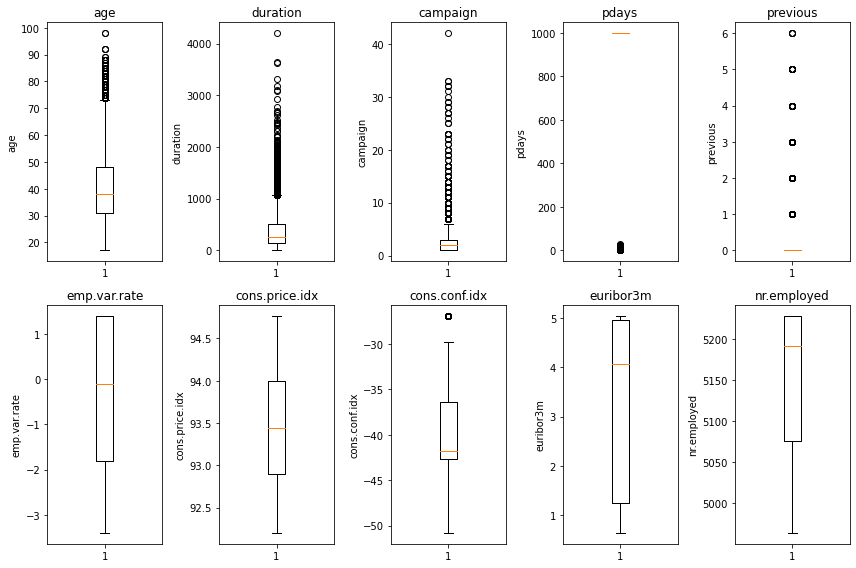

In [6]:
import matplotlib.pyplot as plt

# Select the numerical columns
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Create box plots for each numerical column
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    ax = axes[i]
    ax.boxplot(data[col])
    ax.set_title(col)
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

In [7]:
# Set the percentile thresholds
lower_threshold = 0.01
upper_threshold = 0.99

# Iterate over each numerical column
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for col in numerical_columns:
    # Calculate the lower and upper limits
    lower_limit = data[col].quantile(lower_threshold)
    upper_limit = data[col].quantile(upper_threshold)
    
    # Apply capping to the column
    data[col] = data[col].clip(lower_limit, upper_limit)

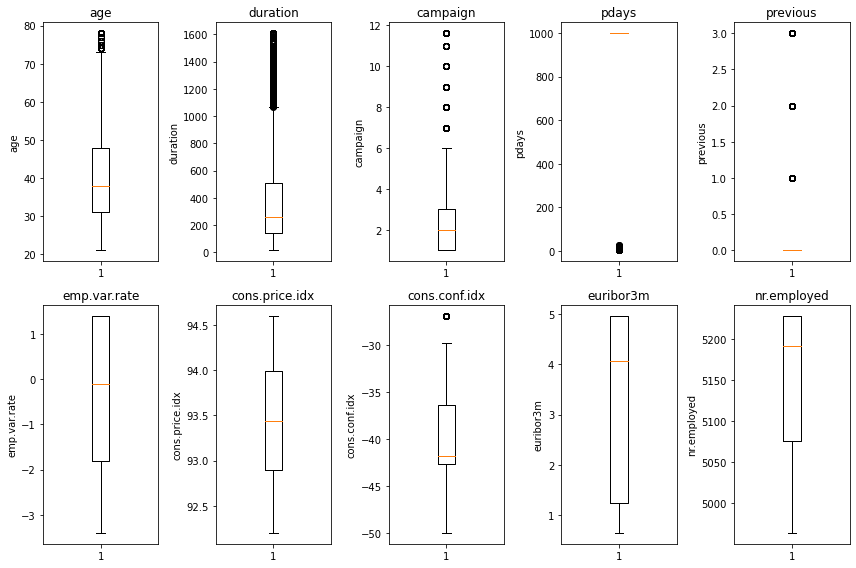

In [8]:
# Select the numerical columns
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Create box plots for each numerical column
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    ax = axes[i]
    ax.boxplot(data[col])
    ax.set_title(col)
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Separate the dependent and the independent variables. Also, in the target variable, replace yes with 0 and no with 1 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# Separate the dependent variable (target) and independent variables
X = data.drop('y', axis=1)
y = data['y']

# Replace 'yes' with 0 and 'no' with 1 in the target variable
y = y.replace({'yes': 0, 'no': 1})

In [10]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,32.0,205.0,2.0,999.0,0.0,1.1,93.994,-36.4,4.858,5191.0
1,32.0,691.0,10.0,999.0,0.0,1.4,93.918,-42.7,4.960,5228.1
2,45.0,45.0,8.0,999.0,0.0,1.4,93.444,-36.1,4.963,5228.1
3,33.0,400.0,1.0,5.0,2.0,-1.1,94.601,-49.5,1.032,4963.6
4,47.0,903.0,2.0,999.0,1.0,-1.8,93.075,-47.1,1.415,5099.1
...,...,...,...,...,...,...,...,...,...,...
9635,37.0,854.0,3.0,999.0,0.0,1.4,94.465,-41.8,4.961,5228.1
9636,40.0,353.0,2.0,999.0,0.0,1.4,93.918,-42.7,4.960,5228.1
9637,42.0,86.0,1.0,999.0,1.0,-0.1,93.200,-42.0,4.191,5195.8
9638,39.0,233.0,1.0,999.0,0.0,1.4,94.465,-41.8,4.864,5228.1


In [11]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9635    1
9636    1
9637    1
9638    1
9639    1
Name: y, Length: 9640, dtype: int64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Remove the unnecessary variables that will not contribute to the model. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Plot the distribution of all the numeric variables and find the value of skewness for each variable. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

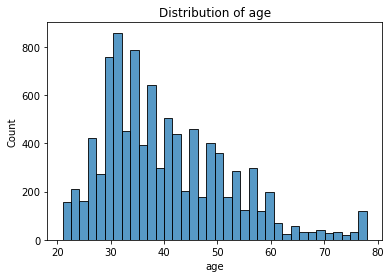

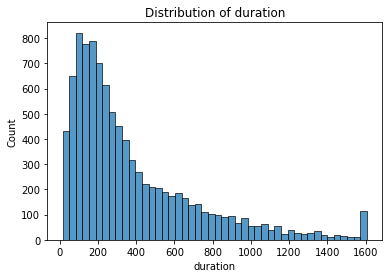

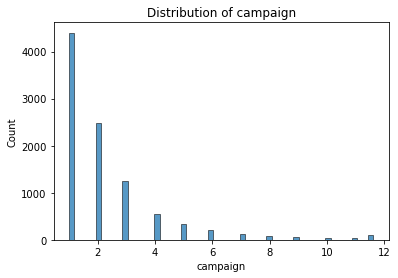

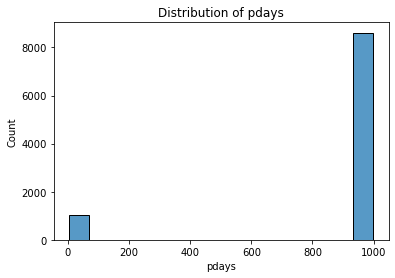

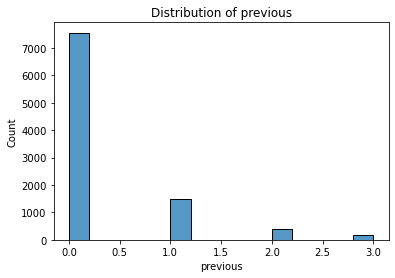

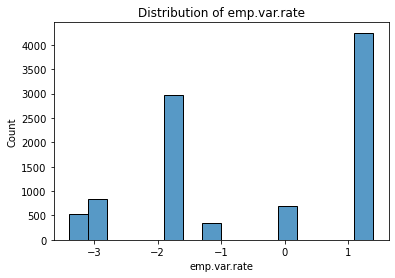

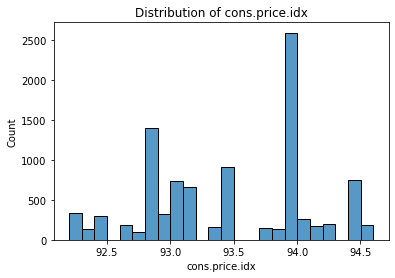

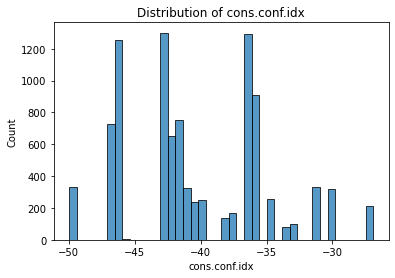

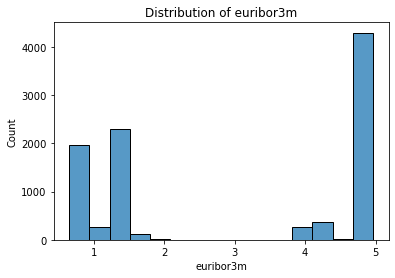

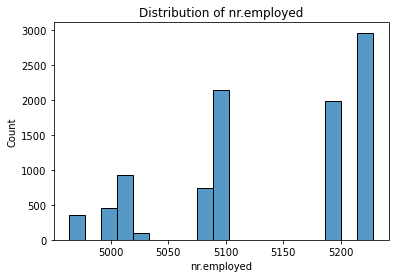

In [12]:
import seaborn as sns
# Select numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot the distribution of numeric variables
for column in numeric_columns:
    sns.histplot(data[column])
    plt.title(f'Distribution of {column}')
    plt.show()



In [13]:
# Calculate the skewness for each variable
skewness = data[numeric_columns].skew()
print("Skewness:")
print(skewness)

Skewness:
age               0.893615
duration          1.582500
campaign          2.494168
pdays            -2.549352
previous          2.388135
emp.var.rate     -0.181234
cons.price.idx   -0.142934
cons.conf.idx     0.362093
euribor3m        -0.058310
nr.employed      -0.463581
dtype: float64


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

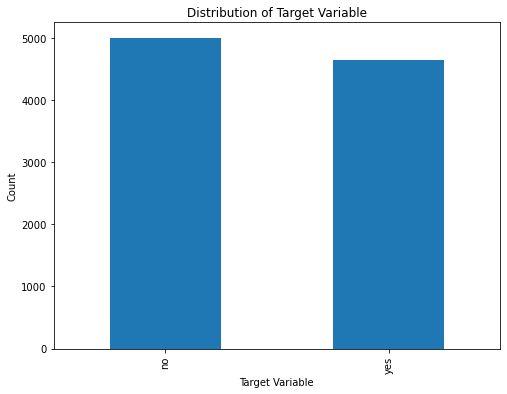

In [14]:
plt.figure(figsize=(8, 6))
data['y'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()

# Scale the numeric variables
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [16]:
data[numeric_columns]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.705287,-0.512891,-0.148821,0.345495,-0.464270,0.908285,0.810242,0.726681,0.983269,0.620697
1,-0.705287,0.953196,3.979373,0.345495,-0.464270,1.082931,0.689391,-0.459614,1.037353,1.050379
2,0.406270,-0.995553,2.947324,0.345495,-0.464270,1.082931,-0.064335,0.783171,1.038944,1.050379
3,-0.619782,0.075354,-0.664845,-2.897706,2.650248,-0.372451,1.775456,-1.740060,-1.045415,-2.012985
4,0.577278,1.592724,-0.148821,0.345495,1.092989,-0.779958,-0.651096,-1.288138,-0.842335,-0.443662
...,...,...,...,...,...,...,...,...,...,...
9635,-0.277765,1.444908,0.367203,0.345495,-0.464270,1.082931,1.559197,-0.290143,1.037883,1.050379
9636,-0.021252,-0.066428,-0.148821,0.345495,-0.464270,1.082931,0.689391,-0.459614,1.037353,1.050379
9637,0.149757,-0.871871,-0.664845,0.345495,1.092989,0.209702,-0.452329,-0.327804,0.629601,0.676289
9638,-0.106756,-0.428425,-0.664845,0.345495,-0.464270,1.082931,1.559197,-0.290143,0.986450,1.050379


<a id="logreg"> </a>
## 2. Logistic regression model

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>How does a unit change in each feature influence the odds of a client subscribed a term deposit or not?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
# Fit a logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

# Retrieve the coefficients (log-odds)
coefficients = logreg.coef_[0]

# Retrieve the feature names
feature_names = X.columns

# Print the interpretation of coefficients
for feature, coef in zip(feature_names, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef}")

Feature: age, Coefficient: -0.00271794074067542
Feature: duration, Coefficient: -0.006702206031637094
Feature: campaign, Coefficient: -0.0007357151078200147
Feature: pdays, Coefficient: 0.0018856505508126633
Feature: previous, Coefficient: 0.03572118813709743
Feature: emp.var.rate, Coefficient: 0.3505183756407891
Feature: cons.price.idx, Coefficient: -0.28576241989053724
Feature: cons.conf.idx, Coefficient: -0.05044283236795972
Feature: euribor3m, Coefficient: 0.32566680720100305
Feature: nr.employed, Coefficient: 0.004818579544665857


C:\Users\ROYAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal threshold</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.metrics import precision_recall_fscore_support
# Predict probabilities for the test set
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Define a range of thresholds to evaluate
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Evaluate F1-score for each threshold
best_threshold = None
best_f1_score = 0.0

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    _, _, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    if f1_score > best_f1_score:
        best_f1_score = f1_score
        best_threshold = threshold

print("Best Threshold:", best_threshold)
print("Best F1-Score:", best_f1_score)

Best Threshold: 0.4
Best F1-Score: 0.8520992366412213


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
from sklearn.metrics import confusion_matrix
# Set the threshold
threshold = 0.5

# Convert probabilities to binary predictions based on the threshold
y_pred = (y_pred_proba >= threshold).astype(int)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Extract the values from the confusion matrix
true_negative, false_positive, false_negative, true_positive = confusion_mat.ravel()

# Calculate the accuracy
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

print("Confusion Matrix:")
print(confusion_mat)
print("Accuracy:", accuracy)

Confusion Matrix:
[[781 143]
 [153 851]]
Accuracy: 0.8464730290456431


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Calculate value of kappa for the full model . Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
from sklearn.metrics import cohen_kappa_score
# Set the threshold
threshold = 0.1

# Convert probabilities to binary predictions based on the threshold
y_pred = (y_pred_proba >= threshold).astype(int)

# Calculate Cohen's kappa
kappa = cohen_kappa_score(y_test, y_pred)

print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.4475833062025395


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Calculate the cross entropy for the logistic regression model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
from sklearn.metrics import log_loss
# Calculate the cross-entropy loss
cross_entropy = log_loss(y_test, y_pred_proba)

print("Cross-Entropy Loss:", cross_entropy)

Cross-Entropy Loss: 0.3608536907115025


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Predict whether a client subscribed a term deposit or not. For the logistic regression model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.6646216768916156
Recall: 0.9711155378486056
F1-Score: 0.7891541885876163


## 3.Build a Decision Tree model and generate a classification report.



In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report



In [24]:
# Fit a Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       924
           1       0.84      0.84      0.84      1004

    accuracy                           0.83      1928
   macro avg       0.83      0.83      0.83      1928
weighted avg       0.83      0.83      0.83      1928



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
}

# Create a Decision Tree model
dt = DecisionTreeClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.8781120331950207


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# Fit the Full model (Logistic Regression)
full_model = LogisticRegression()
full_model.fit(X_train, y_train)

# Make predictions using the Full model
y_pred_full = full_model.predict(X_test)

# Calculate metrics for the Full model
accuracy_full = accuracy_score(y_test, y_pred_full)
precision_full = precision_score(y_test, y_pred_full)
recall_full = recall_score(y_test, y_pred_full)
f1_full = f1_score(y_test, y_pred_full)

# Fit the Optimized model (Decision Tree)
optimized_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2, min_samples_leaf=1)
optimized_model.fit(X_train, y_train)

# Make predictions using the Optimized model
y_pred_optimized = optimized_model.predict(X_test)

# Calculate metrics for the Optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized)
recall_optimized = recall_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized)

# Print the metrics for both models
print("Full Model Metrics:")
print("Accuracy:", accuracy_full)
print("Precision:", precision_full)
print("Recall:", recall_full)
print("F1-Score:", f1_full)
print()
print("Optimized Model Metrics:")
print("Accuracy:", accuracy_optimized)
print("Precision:", precision_optimized)
print("Recall:", recall_optimized)
print("F1-Score:", f1_optimized)

Full Model Metrics:
Accuracy: 0.8475103734439834
Precision: 0.8585858585858586
Recall: 0.8466135458167331
F1-Score: 0.8525576730190572

Optimized Model Metrics:
Accuracy: 0.8786307053941909
Precision: 0.9355203619909502
Recall: 0.8237051792828686
F1-Score: 0.8760593220338982


C:\Users\ROYAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 4.Build a Random Forest model with n_estimators=30 and generate a classification report.



In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [29]:
# Create a Random Forest model with n_estimators=30
random_forest = RandomForestClassifier(n_estimators=30)

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       924
           1       0.92      0.85      0.88      1004

    accuracy                           0.88      1928
   macro avg       0.88      0.88      0.88      1928
weighted avg       0.89      0.88      0.88      1928



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 30, 50],  # Example values, modify as needed
    'max_depth': [None, 5, 10],    # Example values, modify as needed
    'min_samples_split': [2, 5, 10]  # Example values, modify as needed
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')  # Modify cv and scoring as needed
grid_search.fit(X_train, y_train)  # X_train and y_train are your training data
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [32]:
optimized_model = RandomForestClassifier(**best_params)
optimized_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=30)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# Make predictions using the Full model
y_pred_full = full_model.predict(X_test)

# Calculate metrics for the Full model
accuracy_full = accuracy_score(y_test, y_pred_full)
precision_full = precision_score(y_test, y_pred_full)
recall_full = recall_score(y_test, y_pred_full)
f1_full = f1_score(y_test, y_pred_full)

# Make predictions using the Optimized model
y_pred_optimized = optimized_model.predict(X_test)

# Calculate metrics for the Optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized)
recall_optimized = recall_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized)

# Print the metrics for both models
print("Full Model Metrics:")
print("Accuracy:", accuracy_full)
print("Precision:", precision_full)
print("Recall:", recall_full)
print("F1-Score:", f1_full)
print()
print("Optimized Model Metrics:")
print("Accuracy:", accuracy_optimized)
print("Precision:", precision_optimized)
print("Recall:", recall_optimized)
print("F1-Score:", f1_optimized)

Full Model Metrics:
Accuracy: 0.8475103734439834
Precision: 0.8585858585858586
Recall: 0.8466135458167331
F1-Score: 0.8525576730190572

Optimized Model Metrics:
Accuracy: 0.8884854771784232
Precision: 0.9228295819935691
Recall: 0.8575697211155379
F1-Score: 0.8890036138358286


## 5.Build the XGBoost model with a learning rate of 0.4 and gamma equal to 3. Calculate the accuracy by plotting the confusion matrix

In [35]:
import xgboost as xgb

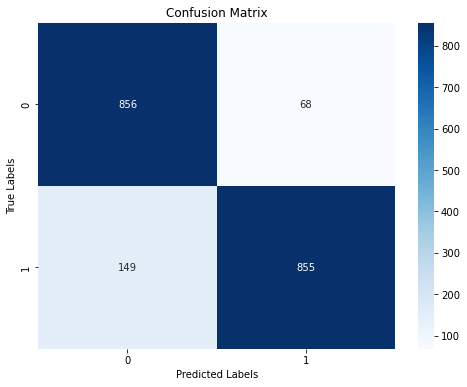

Accuracy: 0.8874481327800829


In [36]:
# Create the XGBoost model
xgb_model = xgb.XGBClassifier(learning_rate=0.4, gamma=3)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the accuracy
print("Accuracy:", accuracy)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'gamma': [1, 2, 3]
}
xgb_model = xgb.XGBClassifier()
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
# Full model
full_model = xgb.XGBClassifier()
full_model.fit(X_train, y_train)
y_pred_full = full_model.predict(X_test)

# Optimized model
optimized_model = xgb.XGBClassifier(learning_rate=0.1, gamma=1)  # Replace with the optimized hyperparameters
optimized_model.fit(X_train, y_train)
y_pred_optimized = optimized_model.predict(X_test)

# Calculate the performance metrics for the Full model
accuracy_full = accuracy_score(y_test, y_pred_full)
precision_full = precision_score(y_test, y_pred_full)
recall_full = recall_score(y_test, y_pred_full)
f1_full = f1_score(y_test, y_pred_full)

# Calculate the performance metrics for the Optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized)
recall_optimized = recall_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized)

# Print the performance metrics for both models
print("Full Model Metrics:")
print("Accuracy:", accuracy_full)
print("Precision:", precision_full)
print("Recall:", recall_full)
print("F1-Score:", f1_full)
print()
print("Optimized Model Metrics:")
print("Accuracy:", accuracy_optimized)
print("Precision:", precision_optimized)
print("Recall:", recall_optimized)
print("F1-Score:", f1_optimized)

Full Model Metrics:
Accuracy: 0.8874481327800829
Precision: 0.919062832800852
Recall: 0.8595617529880478
F1-Score: 0.8883170355120946

Optimized Model Metrics:
Accuracy: 0.8931535269709544
Precision: 0.9281115879828327
Recall: 0.8615537848605578
F1-Score: 0.8935950413223142


## 8. Compare the results of all above mentioned algorithms

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare all the classification models using model performance evaluation metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

C:\Users\ROYAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
# Calculate the performance metrics for each model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
results = pd.DataFrame(columns=metrics)
models = [lr_model, dt_model, rf_model, xgb_model]
predictions = [y_pred_lr, y_pred_dt, y_pred_rf, y_pred_xgb]

for model, prediction in zip(models, predictions):
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    results = results.append(pd.Series([accuracy, precision, recall, f1], index=metrics), ignore_index=True)

# Print the performance metrics for each model
models_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
results.index = models_names
print(results)

                     Accuracy Precision    Recall  F1-Score
Logistic Regression   0.84751  0.858586  0.846614  0.852558
Decision Tree        0.829357   0.83449  0.838645  0.836562
Random Forest        0.881224  0.917115  0.848606  0.881531
XGBoost              0.887448  0.919063  0.859562  0.888317


C:\Users\ROYAL\AppData\Local\Temp\ipykernel_1920\948887546.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.Series([accuracy, precision, recall, f1], index=metrics), ignore_index=True)
C:\Users\ROYAL\AppData\Local\Temp\ipykernel_1920\948887546.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.Series([accuracy, precision, recall, f1], index=metrics), ignore_index=True)
C:\Users\ROYAL\AppData\Local\Temp\ipykernel_1920\948887546.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.Series([accuracy, precision, recall, f1], index=metrics), ignore_index=True)
C:\Users\ROYAL\AppData\Local\Temp\ipykernel_1920\948887546.py:12: FutureWarning: T

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare all the classification models using their ROC curves.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
from sklearn.metrics import roc_curve, auc

In [44]:
# Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)
auc_lr = auc(fpr_lr, tpr_lr)

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
auc_dt = auc(fpr_dt, tpr_dt)

# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

C:\Users\ROYAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


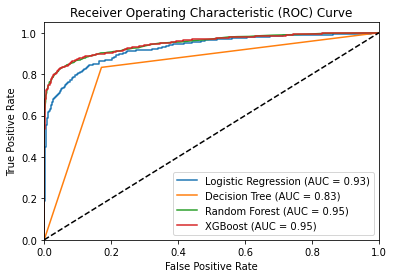

In [45]:
# Plotting the ROC curves
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % auc_lr)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % auc_dt)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % auc_rf)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % auc_xgb)

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>comput cross entropy and Compare all the classification models.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
from sklearn.metrics import log_loss

In [47]:
# Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict_proba(X_test)
cross_entropy_lr = log_loss(y_test, y_pred_lr)

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict_proba(X_test)
cross_entropy_dt = log_loss(y_test, y_pred_dt)

# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict_proba(X_test)
cross_entropy_rf = log_loss(y_test, y_pred_rf)

# XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict_proba(X_test)
cross_entropy_xgb = log_loss(y_test, y_pred_xgb)

# Compare the cross entropy values
cross_entropy_values = {
    'Logistic Regression': cross_entropy_lr,
    'Decision Tree': cross_entropy_dt,
    'Random Forest': cross_entropy_rf,
    'XGBoost': cross_entropy_xgb
}

for model, cross_entropy in cross_entropy_values.items():
    print(f"{model}: Cross Entropy = {cross_entropy}")

C:\Users\ROYAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Cross Entropy = 0.3611514398324288
Decision Tree: Cross Entropy = 5.804234207443496
Random Forest: Cross Entropy = 0.2891832739261127
XGBoost: Cross Entropy = 0.2796799646090161


## 9. Intrepret your solution based on the results